In [25]:
from langgraph.graph  import START, END,StateGraph
from typing import TypedDict,Annotated,List,Tuple
from langchain_groq import ChatGroq
from dotenv import load_dotenv

In [26]:
from langgraph.checkpoint.memory import InMemorySaver

In [27]:
load_dotenv()

True

In [ ]:
import os
# api_key=os.getenv("GROQ_API_KEY")
api_key=
llm = ChatGroq(model='llama-3.1-8b-instant',api_key=api_key)

In [29]:
class Joke_agent(TypedDict):
    topic :str
    joke:str
    explaination: str

In [30]:
def create_joke(state : Joke_agent) -> Joke_agent:
    prompt = f'Generate a joke ,it should be funny on the topic :{state['topic']}'

    response = llm.invoke(prompt)

    return {'joke':response}

In [31]:
def create_explanation(state : Joke_agent) ->Joke_agent:
    prompt = f'Generate the explaination of this joke {state["joke"]}.'
    response = llm.invoke(prompt)

    return {'explaination' : response}

In [32]:
graph = StateGraph(Joke_agent)
graph.add_node('create_joke_node',create_joke)
graph.add_node('create_explanation_node',create_explanation)

graph.add_edge(START,'create_joke_node')
graph.add_edge('create_joke_node','create_explanation_node')

checkpointer = InMemorySaver()

graph.add_edge('create_explanation_node',END)

In [33]:
workflow=graph.compile(checkpointer=checkpointer)

In [34]:
# workflow.invoke({'topic':'bhindi'})

In [35]:
config1 = {"configurable" : {"thread_id" : "1"}}

In [36]:
workflow.invoke({'topic':'samosa'} , config=config1)

{'topic': 'samosa',
 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_time': 0.045778753, 'prompt_tokens_details': None, 'queue_time': 0.083573396, 'total_time': 0.08097063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-8ff8-7641-963d-2a1810802f60-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}),
 'explaination': AIMessage(content='**Samosa Therapy Joke Explanation**\n\nThe joke "Why did the samosa go to therapy? Because it was feeling crumby and had a lot of folded emotions" is a play on wor

In [37]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_time': 0.045778753, 'prompt_tokens_details': None, 'queue_time': 0.083573396, 'total_time': 0.08097063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-8ff8-7641-963d-2a1810802f60-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}), 'explaination': AIMessage(content='**Samosa Therapy Joke Explanation**\n\nThe joke "Why did the samosa go to therapy? Because it was feeling crumby and had a lot of folded emotion

In [38]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_time': 0.045778753, 'prompt_tokens_details': None, 'queue_time': 0.083573396, 'total_time': 0.08097063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-8ff8-7641-963d-2a1810802f60-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}), 'explaination': AIMessage(content='**Samosa Therapy Joke Explanation**\n\nThe joke "Why did the samosa go to therapy? Because it was feeling crumby and had a lot of folded emotio

In [39]:
from IPython.display import display,Image

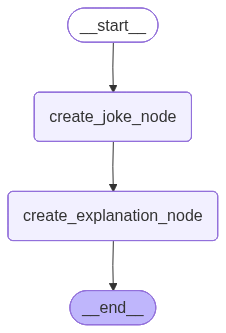

In [40]:
Image(workflow.get_graph().draw_mermaid_png())

In [41]:
config2 ={"configurable" : {"thread_id" : "2"}}
workflow.invoke({'topic' : 'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': AIMessage(content='A man walked into a library and asked the librarian, "Do you have any books on Pavlov\'s dogs and pasta?"\n\nThe librarian replied, "It rings a bell, but I\'m not sure if it\'s a first course or a main course."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 49, 'total_tokens': 101, 'completion_time': 0.065259127, 'completion_tokens_details': None, 'prompt_time': 0.002385068, 'prompt_tokens_details': None, 'queue_time': 0.055411642, 'total_time': 0.067644195}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-9880-7711-946a-1b9da76fe376-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 49, 'output_tokens': 52, 'total_tokens': 101}),
 'explaination': AIMessage(content='**Pavlov\'s Dogs and Pasta Joke Explanation**\n\nThe

In [42]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_time': 0.045778753, 'prompt_tokens_details': None, 'queue_time': 0.083573396, 'total_time': 0.08097063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-8ff8-7641-963d-2a1810802f60-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}), 'explaination': AIMessage(content='**Samosa Therapy Joke Explanation**\n\nThe joke "Why did the samosa go to therapy? Because it was feeling crumby and had a lot of folded emotion

In [43]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_time': 0.045778753, 'prompt_tokens_details': None, 'queue_time': 0.083573396, 'total_time': 0.08097063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba88f-8ff8-7641-963d-2a1810802f60-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}), 'explaination': AIMessage(content='**Samosa Therapy Joke Explanation**\n\nThe joke "Why did the samosa go to therapy? Because it was feeling crumby and had a lot of folded emotio

In [44]:
workflow.get_state({"configurable" : {"thread_id" : "1", "checkpoint_id":"1f0ee2d5-dd72-6e56-bfff-69dad3c33eb3"}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ee2d5-dd72-6e56-bfff-69dad3c33eb3'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

#Time Travel

In [45]:
workflow.get_state({"configurable" : {"thread_id" : "1" , "checkpoint_id":"1f0ee326-5896-6c49-bfff-5bc6619dbce"}} )

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ee326-5896-6c49-bfff-5bc6619dbce'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [46]:
workflow.invoke(None,{"configurable" : {"thread_id" : "1", "checkpoint_id":"1f0ee326-5896-6c49-bfff-5bc6619dbce"}})

EmptyInputError: Received no input for __start__

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.031239432, 'completion_tokens_details': None, 'prompt_time': 0.002359737, 'prompt_tokens_details': None, 'queue_time': 0.055059312, 'total_time': 0.033599169}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba85a-92f3-7623-b94f-bc29928c149e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 26, 'total_tokens': 76}), 'explaination': AIMessage(content='**Joke Explanation:**\n\nThe joke revolves around a play on words and a clever use of puns. The setup, "Why did the samosa go to therapy?", is

#Updating State

In [47]:
workflow.update_state({"configurable" : {"thread_id" : "1" , "checkpoint_id":"1f0ee2d5-dd72-6e56-bfff-69dad3c33eb3" , "checkpoint_ns":""}} , {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ee3a8-4dab-6687-8000-ab14da99f546'}}

In [48]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('create_joke_node',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee3a8-4dab-6687-8000-ab14da99f546'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2026-01-10T15:39:15.292531+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee2d5-dd72-6e56-bfff-69dad3c33eb3'}}, tasks=(PregelTask(id='c0b24be4-bf75-9fdd-daa9-a8e940ffffc7', name='create_joke_node', path=('__pregel_pull', 'create_joke_node'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 50, 'total_tokens': 76, 'completion_time': 0.035191877, 'completion_tokens_details': None, 'prompt_

#Fault Tolerance

In [49]:
from langgraph.graph import StateGraph,END
import time

In [50]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [51]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [52]:

# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:
# try:
#     print("▶️ Running graph: Please manually interrupt during Step 2...")
#     graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
# except KeyboardInterrupt:
#     print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [53]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[]

In [54]:

# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...


EmptyInputError: Received no input for __start__

In [55]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[]